In [2]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [3]:
class LimitFile:
    def __init__(self, fname):
        self.fname = fname

        import pickle
        with open(fname, 'rb') as f:
            self.__dict__.update(pickle.load(f))

        blocks = fname.split('/')


        wp = blocks[-2]
        if 'bdisc' in wp:
            wp = float(wp.split('bdisc')[1].replace('p','.'))
        else:
            wp = 0.2783

        pairing = blocks[-3]
        if pairing.startswith('pn_'):
            algo = 'particle_net'
            pairing = pairing[3:]
        else: algo = 'deepjet'

        variable = blocks[-1]
        if variable.startswith('bdt'):
            variable = 'MVA'
        else:
            variable = 'HH RegMass'

        self.algo = algo
        self.wp = wp
        self.pairing = pairing
        self.variable = variable

In [8]:
path = '/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/scripts/nanoHH4b'

limit_files = []
for base, _, files in os.walk(path):
    if 'hh_mass' in base:
        continue
    if any(files):
        for f in files:
            if 'limit' in f:
                limit_files.append( LimitFile(os.path.join(base, f)) )

In [9]:
deepjet_hh = ObjIter(sorted([f for f in limit_files if f.algo == 'deepjet' and f.variable == 'HH RegMass'], key=lambda f: f.wp))
deepjet_mva = ObjIter(sorted([f for f in limit_files if f.algo == 'deepjet' and f.variable == 'MVA'], key=lambda f: f.wp))

particle_net_hh = ObjIter(sorted([f for f in limit_files if f.algo == 'particle_net' and f.variable == 'HH RegMass'], key=lambda f: f.wp))
particle_net_mva = ObjIter(sorted([f for f in limit_files if f.algo == 'particle_net' and f.variable == 'MVA'], key=lambda f: f.wp))

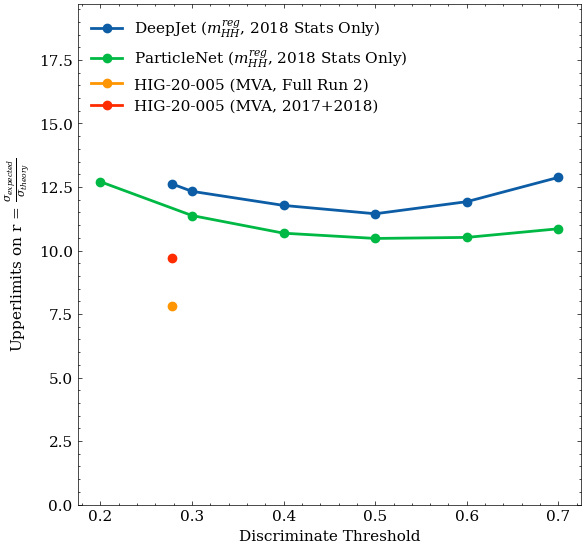

In [12]:
(fig,ax), dj_graph = graph_array(deepjet_hh.wp.npy, deepjet_hh.exp_lim.npy, g_label='DeepJet ($m_{HH}^{reg}$, 2018 Stats Only)')
_, pn_graph = graph_array(particle_net_hh.wp.npy, particle_net_hh.exp_lim.npy, g_label='ParticleNet ($m_{HH}^{reg}$, 2018 Stats Only)', figax=(fig, ax))
graph_array([0.2783],[7.8], g_label='HIG-20-005 (MVA, Full Run 2)', figax=(fig,ax))
graph_array([0.2783], [9.7], g_label='HIG-20-005 (MVA, 2017+2018)', figax=(fig,ax))
format_axes(ax, ylabel='Upperlimits on r = $\\frac{\sigma_{expected}}{\sigma_{theory}}$', xlabel='Discriminate Threshold', legend=True)

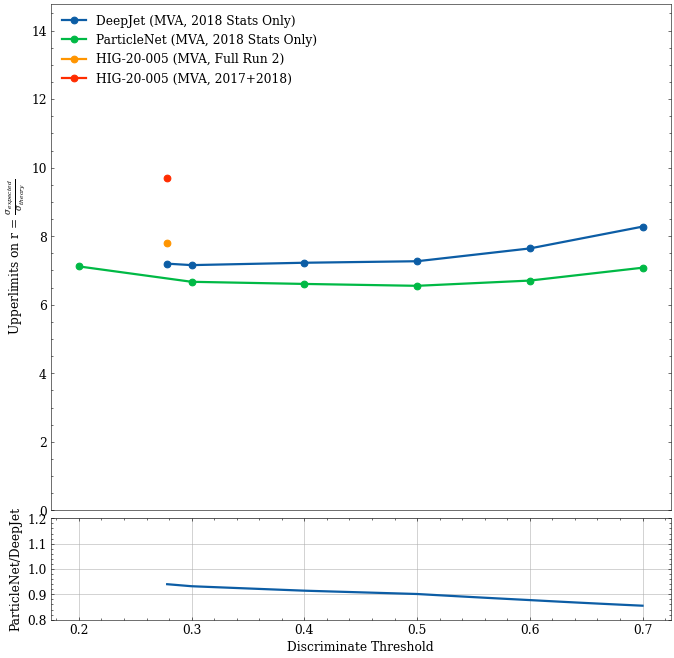

In [11]:
fig, ax = study.get_figax(size=(10,10))
ax, ratio_ax = study.split_axis(ax)

_, dj_graph = graph_array(deepjet_mva.wp.npy, deepjet_mva.exp_lim.npy, g_label='DeepJet (MVA, 2018 Stats Only)', figax=(fig, ax))
_, pn_graph = graph_array(particle_net_mva.wp.npy, particle_net_mva.exp_lim.npy, g_label='ParticleNet (MVA, 2018 Stats Only)', figax=(fig, ax))

graph_array([0.2783],[7.8], g_label='HIG-20-005 (MVA, Full Run 2)', figax=(fig,ax))
graph_array([0.2783], [9.7], g_label='HIG-20-005 (MVA, 2017+2018)', figax=(fig,ax))

format_axes(ax, ylabel='Upperlimits on r = $\\frac{\sigma_{expected}}{\sigma_{theory}}$', xlabel='Discriminate Threshold', legend=True)

ratio = Ratio(pn_graph, dj_graph)
plot_graph(ratio, figax=(fig, ratio_ax))
format_axes(ratio_ax, ylabel='ParticleNet/DeepJet', xlabel='Discriminate Threshold', ylim=(0.8,1.2), grid=True,)